## Predict the Price of cars with Odometer readings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
df1 = pd.read_csv('Xm16-02.csv')

In [4]:
df1.head()

,Price,Odometer,Color
0,14.6,37.4,1
1,14.1,44.8,1
2,14.0,45.8,3
3,15.6,30.9,3
4,15.6,31.7,2


In [ ]:
# Target variable is Price
# Odometer is predictor

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Price       100 non-null float64
Odometer    100 non-null float64
Color       100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [6]:
Price = df1.Price
Odometer = df1["Odometer"]

## model 1 - sklearn library

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# fit the model

In [9]:
m1 = LinearRegression().fit(Odometer,Price) 
m1.fit(Odometer,Price)

ValueError: Expected 2D array, got 1D array instead:
array=[37.4 44.8 45.8 30.9 31.7 34.  45.9 19.1 40.1 40.2 32.4 43.5 32.7 34.5
 37.7 41.4 24.5 35.8 48.6 24.2 38.8 45.6 28.7 38.2 36.7 32.5 39.1 45.3
 34.4 38.4 32.2 26.6 33.5 41.8 36.7 37.5 25.6 40.1 31.  42.2 37.4 34.4
 30.6 42.5 38.4 40.5 26.  46.3 34.8 27.4 47.9 35.6 42.5 43.8 43.5 34.3
 41.4 35.  41.4 30.2 47.2 24.5 21.2 35.5 28.  38.1 42.3 49.2 33.4 37.8
 36.  38.1 35.2 21.  45.8 36.2 34.4 44.3 32.1 34.6 31.  38.6 36.5 25.7
 39.2 21.5 37.1 42.6 33.  31.6 36.  29.1 38.2 31.5 31.4 36.2 34.2 33.2
 39.2 36.4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [10]:
Odometer.shape

(100,)

In [11]:
Odometer1 = Odometer.values.reshape(-1,1)
Odometer1.shape

(100, 1)

In [12]:
m1 = LinearRegression().fit(Odometer1,Price) 
m1.fit(Odometer1,Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# intercept and slope

In [13]:
m1.intercept_

17.24872734291551

In [14]:
m1.coef_

array([-0.06686089])

In [ ]:
# price decreases by 0.06686 dollars for each additional mile

In [15]:
# m1.intercept_ is float number
# m1.coef_ is an nd array

### R-squared

In [16]:
m1.score(Odometer1,Price)

0.6482954749384247

In [17]:
# model m1 explains 64.83% of price variability

### Prediction

In [ ]:
# predict Price of a used car with 40 miles

In [18]:
newval = [[40]]
pred1 = m1.predict(newval)
pred1

array([14.57429193])

### scatterplot

In [ ]:
# fitted values

In [19]:
yhat = m1.predict(Odometer1)

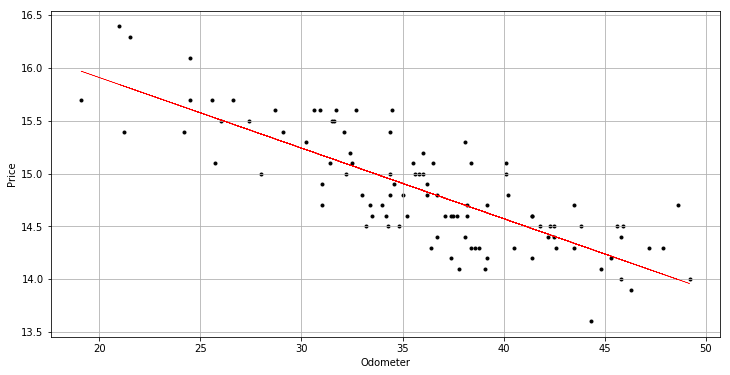

In [20]:
plt.figure(figsize=(12,6))
plt.scatter(Odometer,Price,c='k',s=9)
# add regression line
plt.plot(Odometer,yhat,color = 'r',linewidth = 0.5)
plt.ylabel('Price')
plt.xlabel('Odometer')
plt.grid()

## method 2 - statsmodels.formula.api

In [21]:
import statsmodels.formula.api as smf

In [23]:
m2 = smf.ols(formula = 'Price ~ Odometer',data = df1).fit() 
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     180.6
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           5.75e-24
Time:                        12:58:13   Log-Likelihood:                -28.948
No. Observations:                 100   AIC:                             61.90
Df Residuals:                      98   BIC:                             67.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.2487      0.182     94.725      0.000      16.887      17.610
Odometer      -0.0669      0.005    -13.440      0.000      -0.077      -0.057
==============================================================================
Omnibus:                        5.847   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                2.691
Skew:                           0.042   Prob(JB):                        0.260
Kurtosis:                       2.201   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
m2.params

Intercept    17.248727
Odometer     -0.066861
dtype: float64

### Confidence intervals for slope, intercept

In [25]:
m2.conf_int(alpha = 0.01)

,0,1
Intercept,16.770383,17.727072
Odometer,-0.079929,-0.053793


In [ ]:
# We are 99% confident that,
# for each additional mile the average price of the car decreases 
# an amount between 0.079929 and 0.053793 dollars

In [ ]:
# fitted values (predicted values)

In [26]:
yhat = m2.fittedvalues

### predict

In [27]:
newval = pd.DataFrame([40],columns = ['Odometer'])
newval

,Odometer
0,40


In [ ]:
# column name of newval dataframe must match col name used in the model

In [28]:
pred2 = m2.predict(newval)
pred2

0    14.574292
dtype: float64

### scatterplot

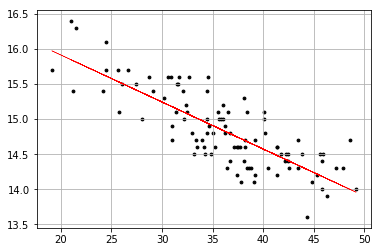

In [29]:
plt.scatter(Odometer,Price,color = 'k',s=8)
plt.plot(Odometer,yhat,color = 'r',linewidth = 0.5)
plt.grid()

### ANOVA Table -dataframe

In [35]:
table1 = sm.stats.anova_lm(m2)
table1

,df,sum_sq,mean_sq,F,PR(>F)
Odometer,1.0,19.255607,19.255607,180.642989,5.750781e-24
Residual,98.0,10.446293,0.106595,NaN,NaN


In [ ]:
# p-value is 5.75e-24 which is zero
# reject Ho: beta0 = 0, and conclude that

In [ ]:
# There is a regression relation between Odometer and Price

### MSE

In [38]:
mse = table1.iloc[1,2]
mse

0.1065948227849632

In [ ]:
# MSE estimates the variance sigma^2

### Standard error of the estimate S

In [39]:
S = np.sqrt(mse)
S

0.32648862581254373

In [ ]:
# this is the average distance to the fitted line -smaller is better

## method 3 - statsmodels.api

In [30]:
import statsmodels.api as sm

In [ ]:
# statsmodels.api requires a column of ones in the array of predictor(s)

In [31]:
Odometer_x = sm.add_constant(Odometer.values)
Odometer_x[:5]

array([[ 1. , 37.4],
       [ 1. , 44.8],
       [ 1. , 45.8],
       [ 1. , 30.9],
       [ 1. , 31.7]])

In [56]:
# fit model

In [32]:
m3 = sm.OLS(Price,Odometer_x).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     180.6
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           5.75e-24
Time:                        12:59:35   Log-Likelihood:                -28.948
No. Observations:                 100   AIC:                             61.90
Df Residuals:                      98   BIC:                             67.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2487      0.182     94.725      0.000      16.887      17.610
x1            -0.0669      0.005    -13.440      0.000      -0.077      -0.057
==============================================================================
Omnibus:                        5.847   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                2.691
Skew:                           0.042   Prob(JB):                        0.260
Kurtosis:                       2.201   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Fitted equation

In [ ]:
# E[Price 000s] = 17.2487 -0.066*(Odometer reading in 000s)

## Coefficient of correlation r

In [ ]:
# Correlation between 2 Pandas Series

In [ ]:
type(Price)

In [36]:
type(Odometer)

pandas.core.series.Series

In [40]:
r = Price.corr(Odometer)
r

-0.8051679793300429

In [ ]:
# this is medium to high correlation

In [41]:
r**2

0.6482954749384244

In [ ]:
# which is equal to R-Square (see Summary Table)

In [ ]:
# 64.83% variability of car prices is explained by Odometer readings

In [ ]:
# Can find correlation r using original DataFrame

In [42]:
df2 = df1.iloc[:,:2]
df2[:5]

,Price,Odometer
0,14.6,37.4
1,14.1,44.8
2,14.0,45.8
3,15.6,30.9
4,15.6,31.7


In [43]:
# Correlation matrix

In [44]:
df2.corr()

,Price,Odometer
Price,1.000000,-0.805168
Odometer,-0.805168,1.000000


### Predictions with CIs and PIs

In [ ]:
# predict price of used cars with 30 and 40 miles

In [45]:
newval = sm.add_constant([40,30])
newval[:5]

array([[ 1., 40.],
       [ 1., 30.]])

In [46]:
predictions = m3.get_prediction(newval)
predictions

In [47]:
# get predictions along with CIs and PIs

In [47]:
predictions.summary_frame(alpha = 0.04)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,14.574292,0.038206,14.494767,14.653816,13.890087,15.258497
1,15.242901,0.044273,15.150749,15.335053,14.557113,15.928689


In [ ]:
# PIs wider than CIs, always

## residuals plots

In [ ]:
# fitted values

In [85]:
yhat = m3.fittedvalues
yhat[:5]

0    14.748130
1    14.253360
2    14.186499
3    15.182726
4    15.129237
dtype: float64

In [86]:
df5 = df1[['Odometer','Price']]
df5[:5]

,Odometer,Price
0,37.4,14.6
1,44.8,14.1
2,45.8,14.0
3,30.9,15.6
4,31.7,15.6


In [87]:
df5['fitted'] = yhat
df5[:5]

,Odometer,Price,fitted
0,37.4,14.6,14.748130
1,44.8,14.1,14.253360
2,45.8,14.0,14.186499
3,30.9,15.6,15.182726
4,31.7,15.6,15.129237


In [51]:
# residuals

In [88]:
residuals = m3.resid

In [89]:
df5['residual'] = residuals
df5[:5]

,Odometer,Price,fitted,residual
0,37.4,14.6,14.748130,-0.148130
1,44.8,14.1,14.253360,-0.153360
2,45.8,14.0,14.186499,-0.186499
3,30.9,15.6,15.182726,0.417274
4,31.7,15.6,15.129237,0.470763


In [ ]:
# residuals sum

In [102]:
sum(residuals)

-5.435651928564766e-13

In [101]:
# sum of residuals always zero

### standard residuals

In [90]:
std_residuals = m3.get_influence().resid_studentized_internal
std_residuals[:5]

array([-0.45609605, -0.47642567, -0.58066496,  1.28845715,  1.45232848])

In [91]:
df5['stdres'] = std_residuals
df5[:5]

,Odometer,Price,fitted,residual,stdres
0,37.4,14.6,14.748130,-0.148130,-0.456096
1,44.8,14.1,14.253360,-0.153360,-0.476426
2,45.8,14.0,14.186499,-0.186499,-0.580665
3,30.9,15.6,15.182726,0.417274,1.288457
4,31.7,15.6,15.129237,0.470763,1.452328


### plot Standard residuals

In [59]:
from matplotlib.pyplot import figure

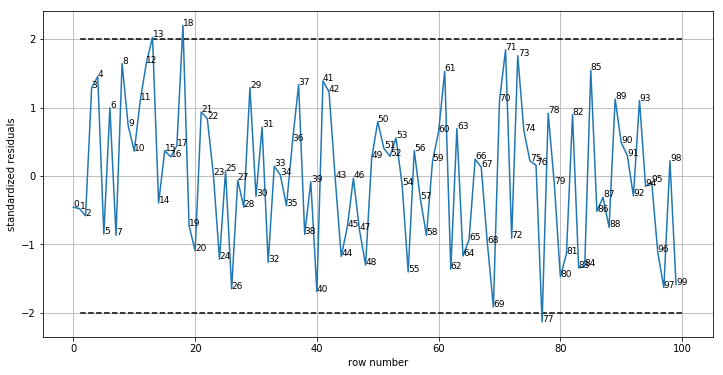

In [62]:
figure(figsize=(12,6))
plt.plot(std_residuals)
plt.hlines(2,100,1,color='k',linestyles = 'dashed')
plt.hlines(-2,100,1,color='k',linestyles = 'dashed')
plt.ylabel('standardized residuals')
plt.xlabel('row number')
plt.grid()

for i in range(100):
    plt.annotate(i,(i,std_residuals[i]),fontsize=9)

In [ ]:
# obs outside bounds (-2,2) are outliers

In [ ]:
# rows 13, 18, and 77 are mild outliers

In [ ]:
# A trend may indicate lack of independence

### Normal qqplot of standardized residuals

In [63]:
from statsmodels.graphics.gofplots import ProbPlot

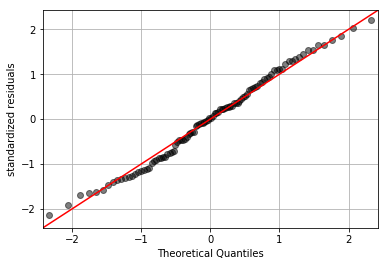

In [64]:
plot1 = ProbPlot(std_residuals)
plot1.qqplot(line='45', alpha=0.5, c='k')
plt.ylabel('standardized residuals')
plt.grid()

In [ ]:
# residuals do not deviate from 45 degree line

In [ ]:
# normality assumption holds

### Standard residuals versus fitted values

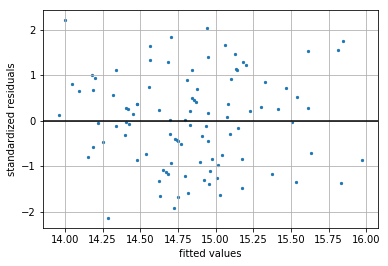

In [68]:
plt.scatter(yhat,std_residuals,s=5)
plt.axhline(c='k')
plt.xlabel('fitted values')
plt.ylabel('standardized residuals')
plt.grid()

### Density plot of standard residuals for mmm1

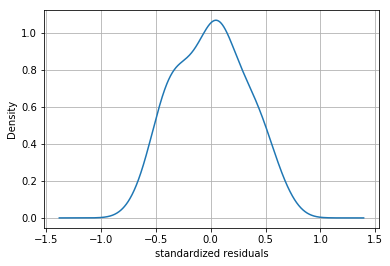

In [69]:
residuals.plot(kind='kde')
plt.xlabel('standardized residuals')
plt.grid()

In [ ]:
# test for normality
# H0: observations are normal

In [70]:
import scipy

In [72]:
scipy.stats.shapiro(std_residuals)

(0.9847961068153381, 0.3069918751716614)

In [ ]:
# test statistic = 0.9848
# p-value = 0.307   is not small

In [81]:
# do not reject H0

## Predictions - Confidence intervals and Prediction intervals

In [ ]:
# predict prices of cars with Odometer readings between 10 to 60

In [74]:
xaxis = range(10,60)

In [75]:
new = sm.add_constant(xaxis)
new[:5]

array([[ 1., 10.],
       [ 1., 11.],
       [ 1., 12.],
       [ 1., 13.],
       [ 1., 14.]])

In [116]:
type(new)

numpy.ndarray

In [86]:
# convert to dataframe and predict

In [76]:
newval = pd.DataFrame(new)
d2 = m3.get_prediction(newval)

In [118]:
type(d2)

statsmodels.regression._prediction.PredictionResults

In [ ]:
# CI and PI for each Odometer value in range 10 to 60

In [77]:
d2.summary_frame()[:5]

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,16.580118,0.133451,16.315290,16.844947,15.880178,17.280059
1,16.513258,0.128633,16.257990,16.768526,15.816878,17.209637
2,16.446397,0.123828,16.200665,16.692129,15.753456,17.139337
3,16.379536,0.119036,16.143312,16.615760,15.689910,17.069162
4,16.312675,0.114261,16.085928,16.539421,15.626238,16.999112


In [120]:
# select columns

In [80]:
predictions = d2.summary_frame()['mean']
ci_lwr = d2.summary_frame().mean_ci_lower
ci_upr = d2.summary_frame().mean_ci_upper
pi_lwr = d2.summary_frame().obs_ci_lower
pi_upr = d2.summary_frame().obs_ci_upper

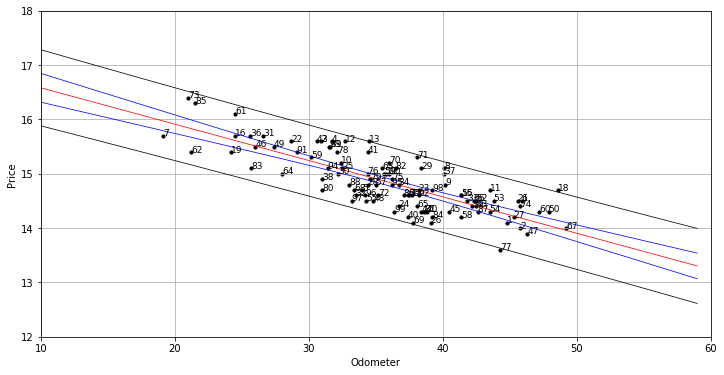

In [103]:
plt.figure(figsize=(12,6))
plt.scatter(Odometer,Price,s=10,c='k')
plt.xlim(10,60)
plt.ylim(12,18)
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.grid()

# plot regression line
plt.plot(xaxis,predictions,c='r',lw = 0.75)

# plot CIs -blue
plt.plot(xaxis,ci_lwr,c='b',lw=0.75)
plt.plot(xaxis,ci_upr,c='b',lw=0.75)

# plot PIs -black
plt.plot(xaxis,pi_lwr,c='k',lw=0.75)
plt.plot(xaxis,pi_upr,c='k',lw=0.75)

for i in range(100):
    plt.annotate(i,(Odometer[i],Price[i]),fontsize=9)

In [ ]:
# rows 13, 18, and 77 mild outliers

In [97]:
df5.iloc[[13,18,77],]

,Odometer,Price,fitted,residual,stdres
13,34.5,15.6,14.942027,0.657973,2.025997
18,48.6,14.7,13.999288,0.700712,2.198254
77,44.3,13.6,14.286790,-0.686790,-2.131403


In [99]:
np.around(df5.residual.describe(),5)

count    100.00000
mean      -0.00000
std        0.32484
min       -0.68679
25%       -0.27263
50%        0.00521
75%        0.23210
max        0.70071
Name: residual, dtype: float64